In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Project-X-Lip-Reading

/content/drive/.shortcut-targets-by-id/1_r1ryXDRaCdsR0PFGkkxkbeXFIv5d38H/Project-X-Lip-Reading


In [3]:
import pickle
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, MaxPooling3D
from tensorflow.keras.layers import Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam

In [4]:
with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/X_train.pkl', 'rb') as f:
   X_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/train/y_train.pkl', 'rb') as f:
   y_train = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/X_test.pkl', 'rb') as f:
   X_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/test/y_test.pkl', 'rb') as f:
   y_test = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/X_val.pkl', 'rb') as f:
   X_val = pickle.load(f)

with open('/content/drive/MyDrive/Project-X-Lip-Reading/Dataset/words/val/y_val.pkl', 'rb') as f:
   y_val = pickle.load(f)

In [5]:
def build_3d_cnn_model(input, num_classes = 10, learning_rate = 0.01, dropout_rate = 0.5):

    model = Sequential()

    # 1st Layer group
    model.add(Conv3D(32, (3, 3, 3), strides = 1, input_shape=input, activation='relu', padding='valid'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

    # 2nd Layer group
    model.add(Conv3D(64, (3, 3, 3), activation='relu', strides=1))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

    # 3rd Layer group
    model.add(Conv3D(128, (3, 3, 3), activation='relu', strides=1))
    model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=2))

    # Reshape
    model.add(Reshape((128, 1*10*10)))

    # LSTMS Layer
    model.add(LSTM(32, return_sequences=True))
    model.add(Dropout(dropout_rate))

    # Flatten Layer
    model.add((Flatten()))

    # Dense & Dropout Layers
    model.add(Dense(2048, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(dropout_rate))

    # Softmax Layer
    model.add(Dense(num_classes, activation='softmax'))

    # Model Compilation
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [6]:
# Tuning Hyperparameters
input = (28, 100, 100, 1)
num_classes = 11
learning_rate = 0.001
dropout_rate = 0.5

In [7]:
# Build Model
model = build_3d_cnn_model(input, num_classes, learning_rate, dropout_rate)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                      │ (None, 26, 98, 98, 32)      │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d (MaxPooling3D)         │ (None, 13, 49, 49, 32)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 11, 47, 47, 64)      │          55,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_1 (MaxPooling3D)       │ (None, 5, 23, 23, 64)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_2 (Conv3D)                    │ (None, 3, 21, 21, 128)      │         221,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 1, 10, 10, 128)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 128, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 128, 32)             │          17,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2048)                │       8,390,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 11)                  │          11,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,794,699 (41.18 MB)

 Trainable params: 10,794,699 (41.18 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Early Stopping
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor="loss", patience=4)

# Model Training
import time
t1 = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size = 32)
t2 = time.time()
print(f"Training time : {t2 - t1} sec")

Epoch 1/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 21s 351ms/step - accuracy: 0.1065 - loss: 2.3717 - val_accuracy: 0.1385 - val_loss: 2.3106
Epoch 2/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 295ms/step - accuracy: 0.1102 - loss: 2.3187 - val_accuracy: 0.1154 - val_loss: 2.2909
Epoch 3/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 288ms/step - accuracy: 0.1325 - loss: 2.2976 - val_accuracy: 0.1000 - val_loss: 2.2755
Epoch 4/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 294ms/step - accuracy: 0.1397 - loss: 2.2997 - val_accuracy: 0.1615 - val_loss: 2.2630
Epoch 5/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 297ms/step - accuracy: 0.1449 - loss: 2.2831 - val_accuracy: 0.1385 - val_loss: 2.2774
Epoch 6/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - accuracy: 0.1271 - loss: 2.2885 - val_accuracy: 0.1308 - val_loss: 2.2682
Epoch 7/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 10s 296ms/step - accuracy: 0.1495 - loss: 2.2795 - val_accuracy: 0.1385 - val_loss: 2.2711
Epoch 8/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 307ms/step - accuracy: 0.1582 - loss: 2.2755 - val_accu

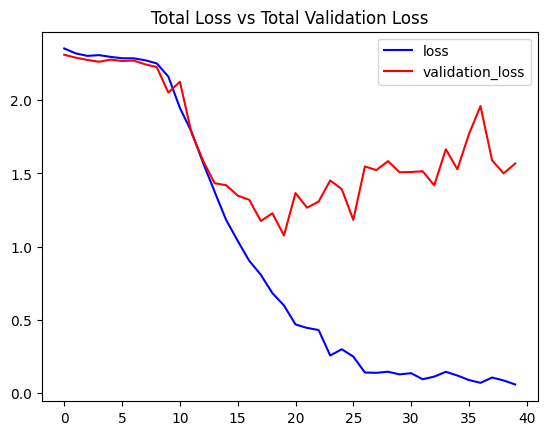

In [10]:
# Visualizing the training and validation loss
plt.plot(history.history['loss'], 'blue', label = 'loss')
plt.plot(history.history['val_loss'], 'red', label = 'validation_loss')
plt.title("Total Loss vs Total Validation Loss")
plt.legend()
plt.show()

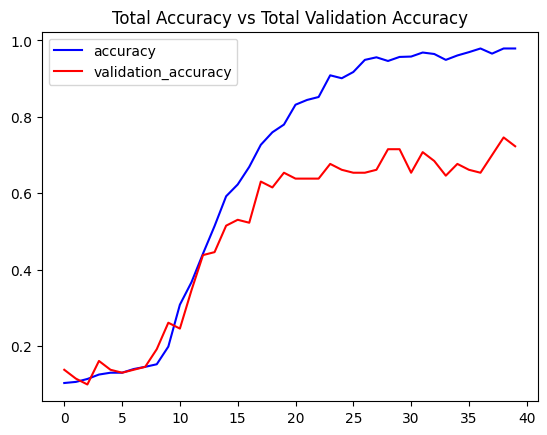

In [11]:
# Visualizing the training and validation accuracy
plt.plot(history.history['accuracy'], 'blue', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'red', label = 'validation_accuracy')
plt.title("Total Accuracy vs Total Validation Accuracy")
plt.legend()
plt.show()

In [12]:
# Model Evaluation
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.7142 - loss: 1.3289 
Accuracy: 70.77%


In [43]:
# Save the model in HDF5 format
model.save('/content/drive/MyDrive/Project-X-Lip-Reading/Model Architecture/Saved Model/3D_CNN_LSTM_words.h5')

In [44]:
# Load the model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Project-X-Lip-Reading/Model Architecture/Saved Model/3D_CNN_LSTM_words.h5')

In [ ]:
# # Saving Model
# model.save('/content/drive/MyDrive/Project-X-Lip-Reading/Model Architecture/Saved Model/3D_CNN_LSTM.keras')